In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np
import lstm, time #helper libraries
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

def parse_df(df):
    df = df.replace('x',0)
    df = df.drop(['diff','Prediction'], axis=1)
    for col in df.columns.values:
        try:
            df[col] = df[col].map(lambda x: str(x).replace('%',''))
            df[col] = df[col].map(lambda x: str(x).replace('$',''))
            df[col] = df[col].astype(float)
        except:
            pass
        
    df = df.dropna(axis=0)

    return df


def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

Using TensorFlow backend.


In [2]:
csvfile = '../Historical sp sample for deeplearing futures prediction jordan july10.csv'
df = pd.read_csv(csvfile, index_col='Local time')

In [3]:
df.head()

,Open,High,Low,Close,diff,Volume,5minute moves,$1155 1 contract margin,5m answer,Prediction,...,10-15up,15-20up,20-25up,25-30up,30-35up,35-40up,40-45up,45-50up,50-55up,55-60up
Local time,,,,,,,,,,,,,,,,,,,,,
25.06.2017 23:00:00.000,2440.400,2440.400,2440.150,2440.399,0.25,0.0051,x,x,8.66%,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.06.2017 23:01:00.000,2440.649,2441.149,2440.649,2440.900,0.00,0.0044,x,x,6.45%,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.06.2017 23:02:00.000,2441.019,2441.520,2440.899,2441.399,0.12,0.0110,x,x,4.29%,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.06.2017 23:03:00.000,2441.519,2441.770,2441.519,2441.770,0.00,0.0054,x,x,3.77%,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.06.2017 23:04:00.000,2441.900,2442.150,2441.650,2441.899,0.25,0.0118,x,x,2.13%,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = parse_df(df)


In [5]:
#Step 1 Load Data
X = df[['Open', 'High', 'Low', 'Close', 'Volume', '5minute moves',
       '$1155 1 contract margin', '5m answer', '1HvH-1', '1HvH-2',
       '1HvH-4', '1HvH-8', '1HvH-16', '2HvH-2', '2HvH-4', '2HvH-8',
       '2HvH-16', '2HvH-32', '3HvH-3', '3HvH-6', '3HvH-12', '3HvH-24',
       '3HvH-48', '5HvH-5', '5HvH-10', '5HvH-20', '5HvH-40', '5HvH-80',
       '1LvL-1', '1LvL-2', '1LvL-4', '1LvL-8', '1LvL-16', '2LvL-2',
       '2LvL-4', '2LvL-8', '2LvL-16', '2LvL-32', '3LvL-3', '3LvL-6',
       '3LvL-12', '3LvL-24', '3LvL-48', '5LvL-5', '5LvL-10', '5LvL-20',
       '5LvL-40', '5LvL-80', '1RvR-1', '1RvR-2', '1RvR-3', '1RvR-4',
       '1RvR-5', '2RvR-2', '2RvR-4', '2RvR-6', '2RvR-8', '2RvR-10',
       '3RvR-3', '3RvR-6', '3RvR-9', '3RvR-12', '3RvR-15', '5RvR-5',
       '5RvR-10', '5RvR-15', '5RvR-20', '5RvR-25', '5minup', '5-10up',
       '10-15up', '15-20up', '20-25up', '25-30up', '30-35up', '35-40up',
       '40-45up', '45-50up', '50-55up', '55-60up']]




In [8]:
## YOU CAN MODIFY 'Close' FOR OTHER FEATURES
X[['Close']].to_csv("jordan.csv", index=False, header=False)

X_train, y_train, X_test, y_test = lstm.load_data('jordan.csv', 50, True)

In [9]:
model = lstm.build_model([1, 50, 100, 1])

> Compilation Time :  0.031021595001220703


In [10]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=3,
    validation_split=0.05)

Train on 3135 samples, validate on 165 samples
Epoch 1/3
3135/3135 [==============================] - 11s - loss: 3.4582e-04 - val_loss: 1.3212e-06
Epoch 2/3
3135/3135 [==============================] - 9s - loss: 2.3551e-06 - val_loss: 1.3284e-06

In [14]:
import matplotlib.pyplot as plt

def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

In [16]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)


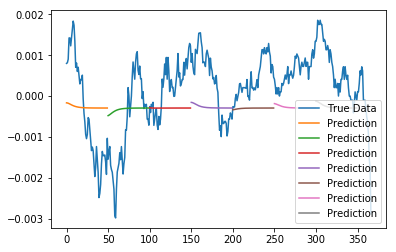

In [18]:
plot_results_multiple(predictions, y_test, 50)   